In [65]:
# Import definition
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

THRESHOLD = 0.5

In [66]:
# ------------------ PREPROCESSING AND DATA FILTERING -------------------- #

# Loading dataset into working desk
data = arff.loadarff('../data/kin8nm.arff')
df = pd.DataFrame(data[0])

#Removes NaN values from dataset by deleting rows
df.dropna(axis=0, how='any', inplace=True)

# Gets X (data matrix) and y (target values column matrix)
X = df.drop("y", axis=1).to_numpy()
y = df['y'].to_numpy()

[0.01187629 0.00544418 0.00601825 ... 0.01941403 0.01692209 0.00585452]


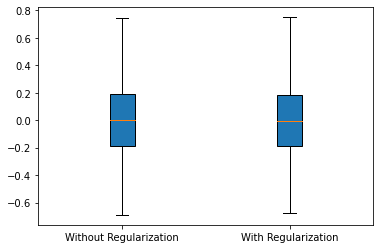

In [67]:
from sklearn.metrics import mean_absolute_error

# Holds predicted values for mlp without (1) and with early stopping (2)
residues1 = []
residues2 = []

# Creates a 5 fold cross validator
skf = KFold(n_splits=5, shuffle=True, random_state=0)

# For each train/test set, we use a MLP classifier without regularization
for train_index, test_index in skf.split(X, y):

    # Uses indexes to fetch which values are going to be used to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #MLP regressor without regularization
    mlp = MLPRegressor(hidden_layer_sizes=(3, 2), alpha= 0, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

    #Trains mlp regressor
    mlp.fit(X_train, y_train.ravel())

    #Predicts new y and saves new values
    y_predicted = mlp.predict(X_test)
    residues1.append(np.subtract(y_test, y_predicted))

# For each tindicator matrixrain/test set, we use a MLP regressor with regularization
for train_index, test_index in skf.split(X, y):

    # Uses indexes to fetch which values are going to be used to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #MLP regressor with regularization (L2) (SOMETHING WRONG IS NOT RIGHT)
    mlp = MLPRegressor(hidden_layer_sizes=(3, 2), alpha = 3.6, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

    #Trains mlp regressor
    mlp.fit(X_train, y_train.ravel())

    #Predicts new y and saves new values
    y_predicted = mlp.predict(X_test)
    residues2.append(np.subtract(y_test, y_predicted))

# Concatenating
out1 = np.concatenate(residues1).ravel()
out2 = np.concatenate(residues2).ravel()

# Debug
verificar = np.subtract(out1, out2)
print(verificar)

#Plot residues
plt.boxplot([out1, out2], patch_artist = True, labels = ['Without Regularization', 'With Regularization'])

#Show plot
plt.show()


In [68]:
print(sum(out1)/len(out1.tolist()))
print(sum(out2)/len(out2.tolist()))

0.0037710570461591325
-0.000128593591685399
